In [3]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [4]:
#xの取りうる値の集合
x_set = np.array([1, 2, 3, 4, 5, 6])

# xの確率関数
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

# xの確率分布
X = [x_set, f]

In [5]:
# 確率 p_k を求める
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

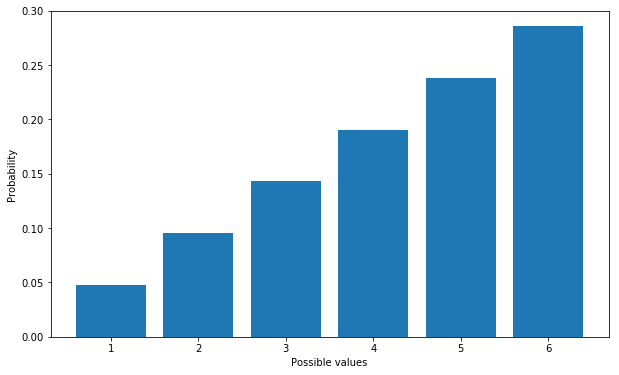

In [6]:
# 確率分布を描画する
#キャンパス
fig = plt.figure(figsize=(10,  6))
ax = fig.add_subplot(111)

ax.bar(x_set, prob)

#X軸,Y軸にラベルを付ける
ax.set_xlabel('Possible values')
ax.set_ylabel('Probability')

#描画
plt.show()

In [7]:
# 確率は0以上である
np.all(prob >= 0)

True

In [8]:
# 確率の総和は1である（ハズなんだ）
np.sum(prob)

0.9999999999999999

In [9]:
# 累積分布関数
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [10]:
# 出目が3以下になる確率
F(3)

0.2857142857142857

In [11]:
# 確率変数の変換
# 2X+3(Yと置く)をしてみる
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [12]:
# 確率変数の期待値（平均）を求める
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [13]:
# 100万回サイコロを振る
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.332273

In [15]:
# 離散型確率変数の期待値
def E(X, g=lambda x : x):
    x_set , f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [16]:
# イカサマサイコロの期待値
E(X)

4.333333333333333

In [17]:
E(X, g=lambda x : 2*x + 3)

11.666666666666664

In [18]:
# E(2X + 3) = 2E(X) + 3 を確認する
2 * E(X) + 3

11.666666666666666

In [23]:
# 分散
mean = E(X)
np.sum([(x_k - mean) ** 2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [29]:
# 離散型確率変数の分散
def V(X, g=lambda x : x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean) ** 2 * f(x_k) for x_k in x_set])

In [30]:
# イカサマサイコロの分散
V(X)

2.2222222222222223

In [31]:
V(X, lambda x : 2 * x + 3)

8.88888888888889

In [32]:
# V(2X + 3) = 2^2V(X) を確認する
2 ** 2 * V(X)

8.88888888888889

In [33]:
# 2次元離散型確率変数
# イカサマサイコロAの出目YとイカサマサイコロBの出目を足した確率変数をXとする
# Y={1, 2, 3, 4, 5, 6}, X={2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [34]:
# 同時確率関数
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x - y <= 6:
        return y * (x - y) / 441
    else:
        return 0

In [38]:
# 確率変数XY
XY = [x_set, y_set, f_XY]

# 確率
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])
prob

array([[0.002, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.005, 0.005, 0.   , 0.   , 0.   , 0.   ],
       [0.007, 0.009, 0.007, 0.   , 0.   , 0.   ],
       [0.009, 0.014, 0.014, 0.009, 0.   , 0.   ],
       [0.011, 0.018, 0.02 , 0.018, 0.011, 0.   ],
       [0.014, 0.023, 0.027, 0.027, 0.023, 0.014],
       [0.   , 0.027, 0.034, 0.036, 0.034, 0.027],
       [0.   , 0.   , 0.041, 0.045, 0.045, 0.041],
       [0.   , 0.   , 0.   , 0.054, 0.057, 0.054],
       [0.   , 0.   , 0.   , 0.   , 0.068, 0.068],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.082]])

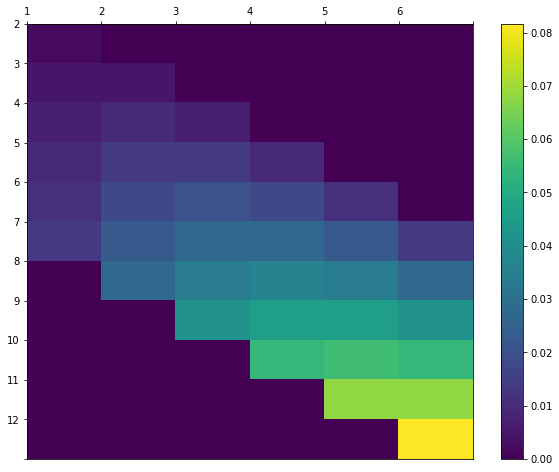

In [55]:
# 確率分布を描画する
#キャンパス
fig = plt.figure(figsize=(10,  8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)

# 目盛りを中間地点につける(numpy.arangeがminor引数を取らないのでできなかった)
ax.set_xticks(np.arange(prob.shape[1] + 0.5))
ax.set_yticks(np.arange(prob.shape[0] + 0.5))

# 目盛りラベルをつける
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)

# y軸を逆転させる
ax.invert_yaxis()

# x軸の目盛りをグラフ上側に表示
ax.xaxis.tick_top()

fig.colorbar(c, ax=ax)

#描画
plt.show()

In [49]:
# 確率は0以上である
np.all(prob >= 0)

True

In [50]:
# 確率の総和は1である
np.sum(prob)

1.0

In [56]:
# 周辺確率分布
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [57]:
# 周辺確率関数
X = [x_set, f_X]
Y = [y_set, f_Y]

In [58]:
# 周辺確率
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_x

array([0.002, 0.009, 0.023, 0.045, 0.079, 0.127, 0.159, 0.172, 0.166,
       0.136, 0.082])

In [59]:
prob_y = np.array([f_Y(y_k) for y_k in y_set])
prob_y

array([0.048, 0.095, 0.143, 0.19 , 0.238, 0.286])

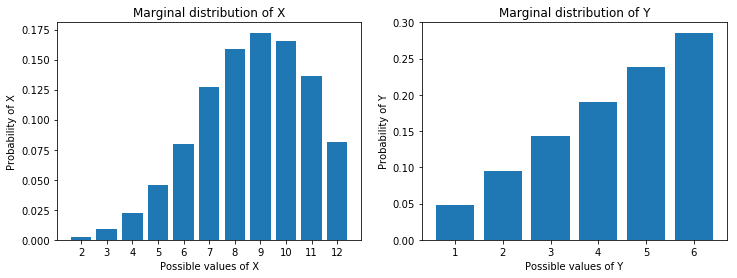

In [62]:
# 確率分布を描画する
#キャンパス
fig = plt.figure(figsize=(12,  4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('Marginal distribution of X')
ax1.set_xlabel('Possible values of X')
ax1.set_ylabel('Probability of X')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Marginal distribution of Y')
ax2.set_xlabel('Possible values of Y')
ax2.set_ylabel('Probability of Y')

#描画
plt.show()